In [24]:
import seaborn as sns
import pandas as pd
import sys
from logging import basicConfig, INFO
import ray
import pickle

from simulation import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
ray.shutdown()
ray.init(log_to_driver=False, _system_config={"local_fs_capacity_threshold": 0.99})

I0000 00:00:1736154429.777006 19727480 chttp2_transport.cc:1182] ipv4:127.0.0.1:62417: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {file:"external/com_github_grpc_grpc/src/core/ext/transport/chttp2/transport/chttp2_transport.cc", file_line:1171, created_time:"2025-01-06T10:07:09.777003+01:00", http2_error:2, grpc_status:14}
2025-01-06 10:07:12,793	INFO worker.py:1812 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.12.8
Ray version:,2.40.0
Dashboard:,http://127.0.0.1:8265


In [13]:
all_dfs = []
for simulations in all_simulations(n_parallel=10, rng=42):
    file_name = str(simulations[0])
    with open(f"simulations/{file_name}.pkl", "wb") as fh:
        pickle.dump(simulations, fh)
    all_dfs.append(make_df(simulations))

Ray Pipeline: 100%|██████████| 648/648 [10:39<00:00,  1.01it/s]


In [14]:
df = pd.concat(all_dfs)

In [21]:
df.loc[~df['success']]

,id,lambda,n_roles,n_persons,total_g0,total_g1,total_cap,caps,tvd,quota,...,g0_caps,g0_caps_perc,g1_caps,g1_caps_perc,n_alloc,alloc_persons_perc,alloc_caps_perc,total_util_perc,g0_util_perc,g1_util_perc
4,25560316,1,5,500,250,250,1000,"[49, 23, 610, 276, 42]",0.773909,EQU50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55289554,1,5,500,250,250,1000,"[49, 23, 610, 276, 42]",0.773909,EQU50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89796052,1,5,500,250,250,1000,"[49, 23, 610, 276, 42]",0.773909,EQU50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26960390,1,5,500,250,250,1000,"[49, 23, 610, 276, 42]",0.773909,EQU50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29546356,1,5,500,250,250,1000,"[49, 23, 610, 276, 42]",0.773909,EQU50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,43936751,5,20,1000,500,500,2000,"[21, 58, 414, 25, 53, 189, 63, 11, 77, 165, 15...",0.411476,EQU50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79532535,5,20,1000,500,500,2000,"[21, 58, 414, 25, 53, 189, 63, 11, 77, 165, 15...",0.411476,EQU50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32566972,5,20,1000,500,500,2000,"[21, 58, 414, 25, 53, 189, 63, 11, 77, 165, 15...",0.411476,EQU50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38061203,5,20,1000,500,500,2000,"[21, 58, 414, 25, 53, 189, 63, 11, 77, 165, 15...",0.411476,EQU50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
x = df.loc[df['quota'] == 'GTE20']['g1_caps_perc'].apply(lambda x: x.min())

In [44]:
alpha_prefs = 1
alpha_caps = 5
n_roles = 5
n_persons = 500
total_cap = 1000
n_simulations = 10
gender_bias = 0.0

sims = run_simulation(alpha_prefs=alpha_prefs,
            alpha_caps=alpha_caps,
            n_roles=n_roles,
            n_persons=n_persons,
            total_cap=total_cap,
            gender_bias=gender_bias,
            n_sims=n_simulations,
            rng=None)

Running simulation with params: %s {'alpha_prefs': 1, 'alpha_caps': 5, 'n_roles': 5, 'n_persons': 500, 'total_cap': 1000, 'n_sims': 10, 'gender_bias': 0.0, 'rng': None}


In [46]:
[exp.is_good for sim in sims for exp in sim.experiments if exp.quota.name == 'EQU50']

[False, False, False, False, False, False, False, False, False, False]

In [146]:
df.loc[df['quota'] == 'GTE20'].iloc[23]['g1_caps_perc']

array([0.87837838, 0.25      , 0.4137931 , 0.2037037 , 0.23809524,
       0.99514563, 0.2       , 0.2       , 0.        , 0.96      ])

In [127]:
df.iloc[762].n_alloc

np.float64(999.0000000000002)

In [135]:
df.loc[df['quota'] == 'GTE20'].iloc[104]['caps']

array([491, 307, 111,  51,   8,   2,  25,   1,   3,   1])

In [75]:
df.loc[df['quota'] == 'GTE20'].iloc[84]

id                                                          25888035
lambda                                                             1
n_roles                                                           10
n_persons                                                       1000
total_g0                                                         500
total_g1                                                         500
total_cap                                                       1000
caps                           [5, 1, 32, 1, 32, 2, 124, 41, 2, 760]
tvd                                                         0.874336
quota                                                          GTE20
success                                                         True
total_util                                                165.151036
g0_util                                                    49.507544
g1_util                                                   115.643492
g0_caps            [0.0, 0.0, 1.0,

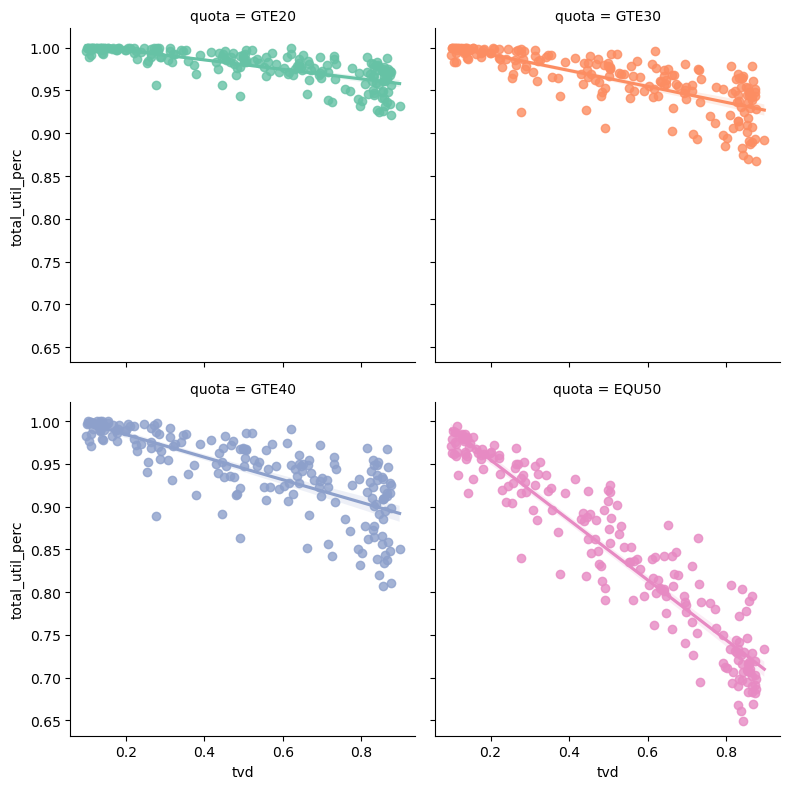

In [151]:
sns.lmplot(data=df.loc[df["quota"] != QuotaType.NONE.name], x="tvd", y="total_util_perc", hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)

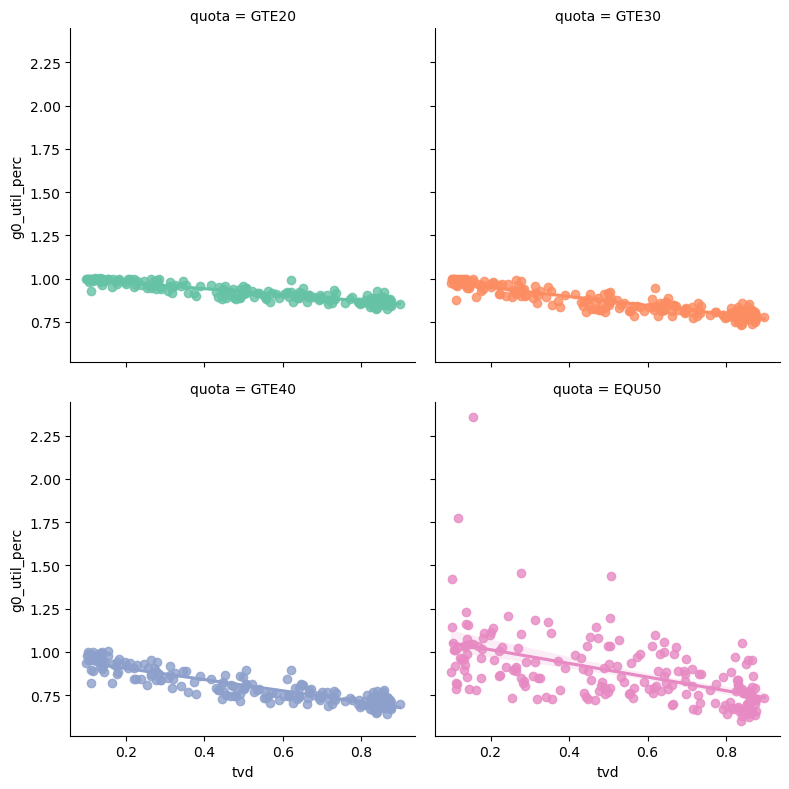

In [152]:
sns.lmplot(data=df.loc[df["quota"] != QuotaType.NONE.name], x="tvd", y="g0_util_perc", hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)

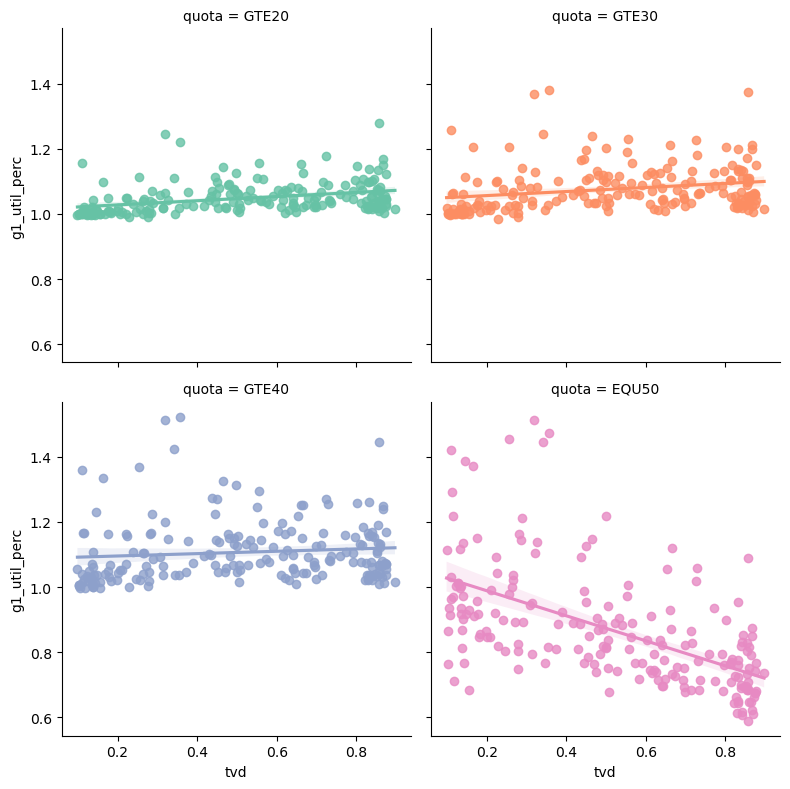

In [153]:
sns.lmplot(data=df.loc[df["quota"] != QuotaType.NONE.name], x="tvd", y="g1_util_perc", hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)

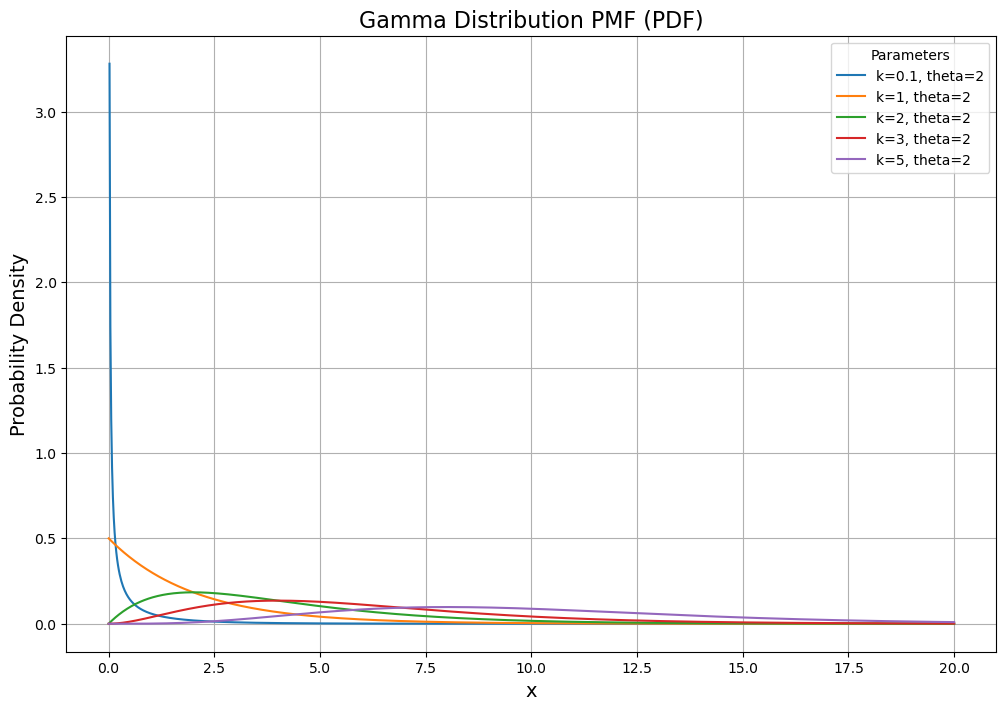

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define the parameters for the Gamma distribution
shape_params = [0.1, 1, 2, 3, 5]  # Shape parameters (k)
scale_params = [2]  # Scale parameters (theta)

# Create a grid for the x values
x = np.linspace(0, 20, 1000)

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through each combination of shape and scale parameters
for k in shape_params:
    for theta in scale_params:
        # Compute the PMF (or PDF, as PMF is typically for discrete)
        pmf_values = gamma.pdf(x, a=k, scale=theta)

        # Plot the values
        sns.lineplot(x=x, y=pmf_values, label=f"k={k}, theta={theta}")

# Customize the plot
plt.title("Gamma Distribution PMF (PDF)", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.legend(title="Parameters")
plt.grid(True)

# Show the plot
plt.show()

<Axes: >

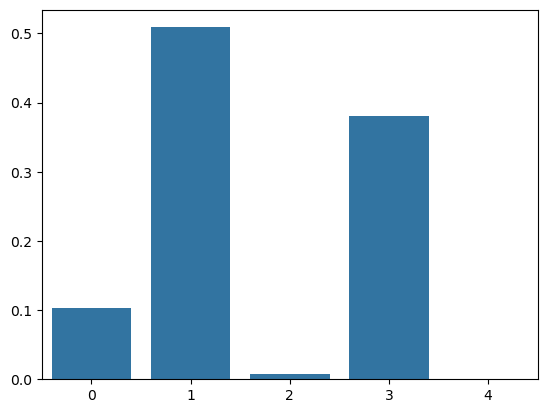

In [28]:
k = np.random.choice(len(simulations))
idx = np.random.choice(simulations[k].data.prefs.shape[0])
sns.barplot(simulations[k].data.prefs[idx])

In [107]:
stick_breaking(10, 10)

array([0.11407941, 0.32570107, 0.02767615, 0.00592941, 0.20433529,
       0.00076306, 0.0833997 , 0.12062375, 0.11582296, 0.0016692 ])